# Indian Liver Patient Classification

#### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading The DataSet
liver_data = pd.read_csv("indian_liver_patient.csv")

In [3]:
# Viewing a part of data using Head
liver_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# Check the info of the data
liver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
liver_data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
liver_data.describe(include='all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [7]:
# Check the columns
liver_data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [8]:
# checking the null values
liver_data.isnull()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [9]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
liver_data.isnull().sum()/len(liver_data)

Age                           0.000000
Gender                        0.000000
Total_Bilirubin               0.000000
Direct_Bilirubin              0.000000
Alkaline_Phosphotase          0.000000
Alamine_Aminotransferase      0.000000
Aspartate_Aminotransferase    0.000000
Total_Protiens                0.000000
Albumin                       0.000000
Albumin_and_Globulin_Ratio    0.006861
Dataset                       0.000000
dtype: float64

#### Data Visualization

1    416
2    167
Name: Dataset, dtype: int64
Male      441
Female    142
Name: Gender, dtype: int64


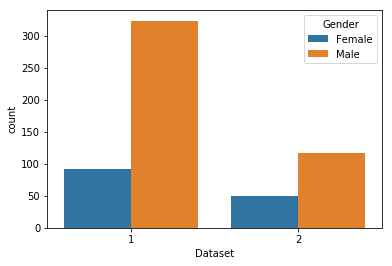

In [11]:
sns.countplot(x = 'Dataset',data=liver_data,hue = 'Gender')
print(liver_data['Dataset'].value_counts())
print(liver_data['Gender'].value_counts())

In [12]:
liver_data[['Age','Gender','Dataset']].groupby(['Dataset','Gender'],as_index=False).count().sort_values(by='Dataset')

,Dataset,Gender,Age
0,1,Female,92
1,1,Male,324
2,2,Female,50
3,2,Male,117


In [13]:
liver_data[['Age','Gender','Dataset']].groupby(['Dataset','Gender'],as_index=False).mean().sort_values(by='Dataset')

,Dataset,Gender,Age
0,1,Female,43.347826
1,1,Male,46.950617
2,2,Female,42.740000
3,2,Male,40.598291


Text(0.5, 0.98, 'Disease by Gender and Age')

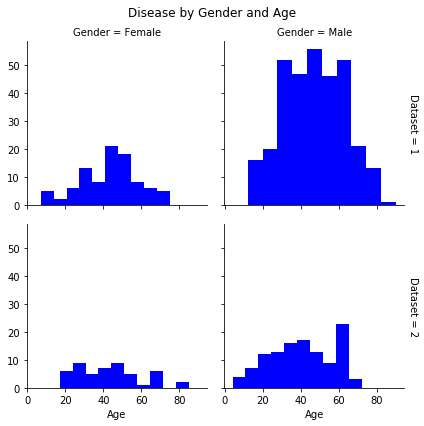

In [14]:
f = sns.FacetGrid(data=liver_data,row='Dataset',col='Gender',margin_titles=True)
f.map(plt.hist,'Age',color='blue')
plt.subplots_adjust(top=0.9)
f.fig.suptitle('Disease by Gender and Age')

In [15]:
liver_data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


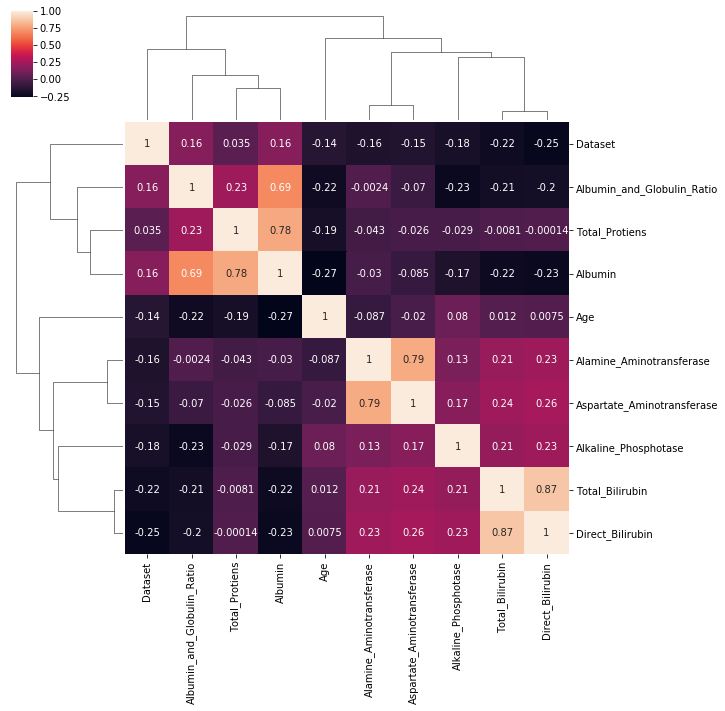

In [16]:
sns.clustermap(liver_data.corr(),annot=True)

from the above correlatation matrix we can find there is strong linear relationship between the following attributes:

Total_Bilirubin and Direct Bilirubin,
Aspartate_Aminotransferase & Alamine_Aminotransferase,
Albumin_and_Globulin_Ratio & Albumin,
Total_Protiens & Albumin,
So here we can remove one feature from each pair and keep the other. Let's remove the following attributes:

Direct Bilirubin,
Alamine_Aminotransferase,
Albumin_and_Globulin_Ratio

In [17]:
liver_data = liver_data.drop(['Direct_Bilirubin','Alamine_Aminotransferase','Albumin_and_Globulin_Ratio'],axis=1)
liver_data.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Dataset
0,65,Female,0.7,187,18,6.8,3.3,1
1,62,Male,10.9,699,100,7.5,3.2,1
2,62,Male,7.3,490,68,7.0,3.3,1
3,58,Male,1.0,182,20,6.8,3.4,1
4,72,Male,3.9,195,59,7.3,2.4,1


In [18]:
liver_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Alkaline_Phosphotase          0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Dataset                       0
dtype: int64

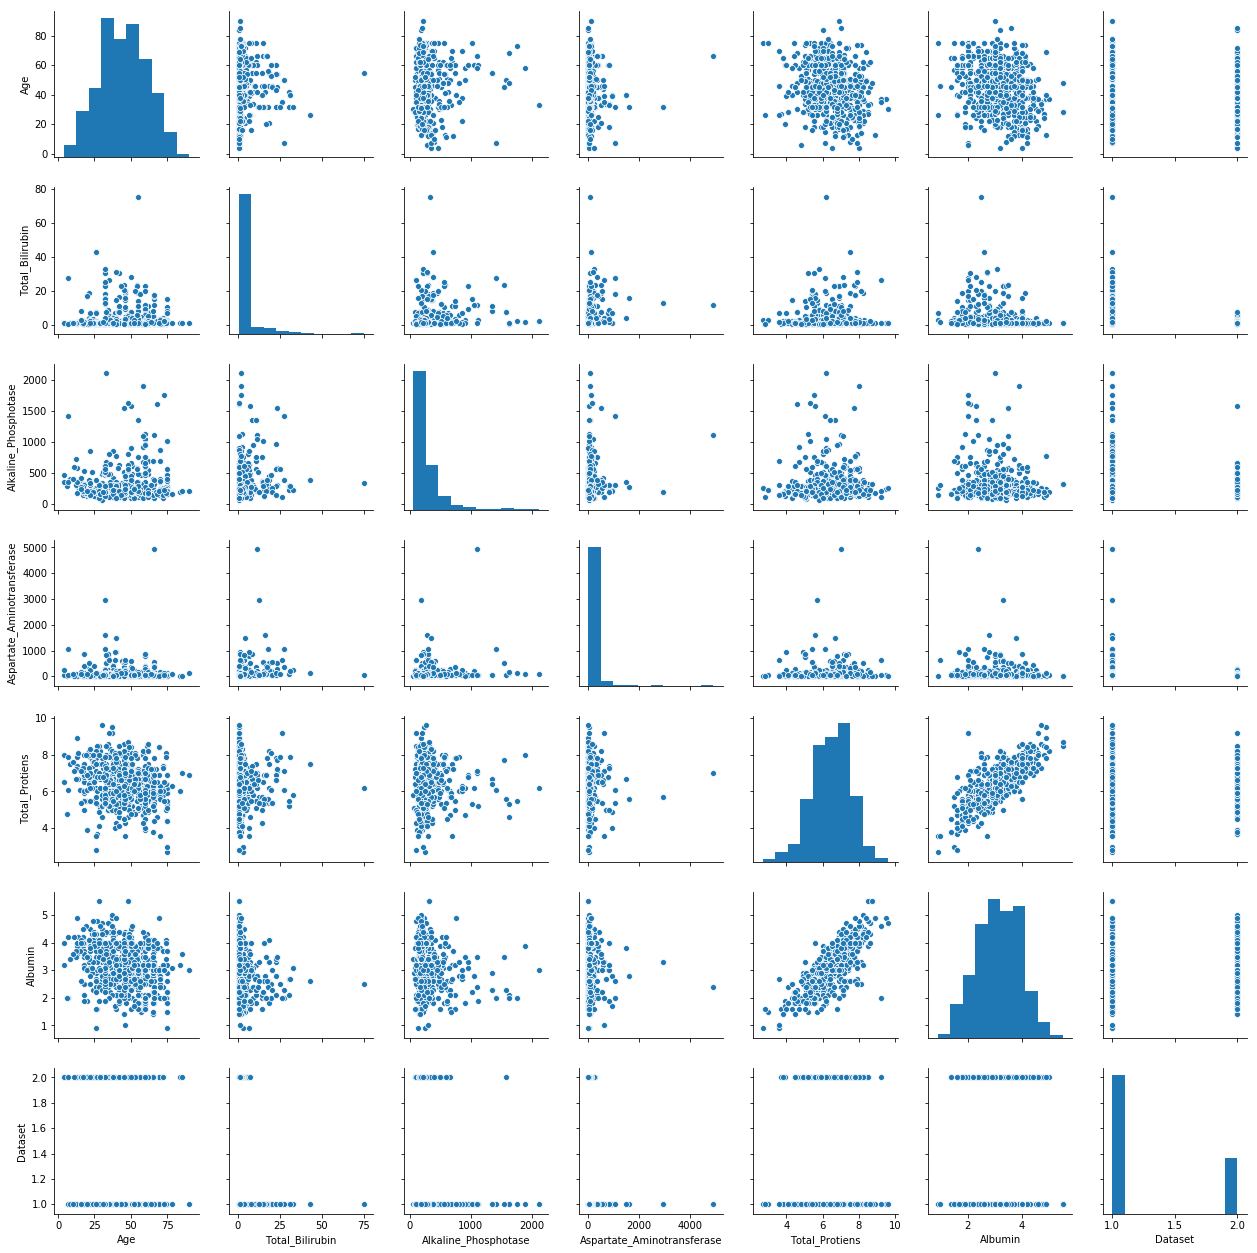

In [19]:
sns.pairplot(liver_data)

In [20]:
print(liver_data['Gender'].unique())
print(liver_data['Dataset'].unique())

['Female' 'Male']
[1 2]


In [21]:
df = pd.get_dummies(liver_data['Gender'],drop_first=True)
liver_data = pd.concat([liver_data,df],axis=1)
liver_data.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Dataset,Male
0,65,Female,0.7,187,18,6.8,3.3,1,0
1,62,Male,10.9,699,100,7.5,3.2,1,1
2,62,Male,7.3,490,68,7.0,3.3,1,1
3,58,Male,1.0,182,20,6.8,3.4,1,1
4,72,Male,3.9,195,59,7.3,2.4,1,1


In [22]:
liver_data = liver_data.drop('Gender',axis=1)

### Applying Machine Learning Algorithms

In [23]:
liver_data['Dataset'].unique()

array([1, 2])

In [24]:
X = liver_data.drop(['Dataset'],axis=1)
y = liver_data['Dataset']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Logistic Regression Model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,random_state=42)
logmodel = LogisticRegression(C=1, penalty='l1')
results = cross_val_score(logmodel, X_train,y_train,cv = kfold)
print(results)
print("Accuracy:",results.mean()*100)

[0.69512195 0.63414634 0.67073171 0.82716049 0.67901235]
Accuracy: 70.12345679012346


#### Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV
# First create logistic regression object
logistic = LogisticRegression()

# Create a list of all different penalty values that you want to tes
penalty = ['l1','l2']

# Create a list of all different C values
C = np.logspace(0,4,10)

# use the dict() function to combine both penalty and C, these are our hyperparameters
hyperparameters = dict(C = C, penalty = penalty)

# Now fit the model using gridsearch
clf = GridSearchCV(logistic, hyperparameters, cv = 5, verbose=0)
best_model = clf.fit(X_train, y_train)

best_model

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
kfold = KFold(n_splits=5,random_state=42)
logmodel = LogisticRegression(C=1.0, penalty='l2')
results = cross_val_score(logmodel, X_train,y_train,cv = kfold)
print(results)
print("Accuracy:",results.mean()*100)

[0.69512195 0.63414634 0.69512195 0.81481481 0.69135802]
Accuracy: 70.61126166817225


### Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
rfcpred = rfc.predict(X_test)

In [31]:
# Looking to Confusion Matrix
print(confusion_matrix(y_test,rfcpred))

[[97 27]
 [32 19]]


In [33]:
# Accuracy Score
print(accuracy_score(y_test,rfcpred)*100)

66.28571428571428
